Importing Libraries


In [125]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img,img_to_array
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from keras.callbacks import EarlyStopping

Image_data Path,Size


In [126]:
train_images=r"D:\ALL\DL\datasets\train_image"
test_images=r"D:\ALL\DL\datasets\test_image"
images_size=(224,224)
batch_size=16

Images preprocessing


In [127]:
data_gen=ImageDataGenerator(rescale=1./255,
                             rotation_range=30,
                             width_shift_range=0.2,height_shift_range=0.2,
                             zoom_range=0.3,
                             brightness_range=[0.2,1.5],
                             horizontal_flip=True,
                             validation_split=0.2)                                                        

Read the training_data


In [128]:
train_data=data_gen.flow_from_directory(train_images,
                                       target_size=images_size,
                                       batch_size=batch_size,
                                       class_mode="binary",
                                       subset="training")
print(train_data.class_indices)  
print(train_data.samples)                                     

Found 64 images belonging to 2 classes.
{'ironman': 0, 'ultron': 1}
64


Read validation_data


In [130]:
val_data=data_gen.flow_from_directory(train_images,
                                             target_size=images_size,
                                             batch_size=batch_size,
                                             class_mode="binary",
                                             subset="validation")
print(val_data.class_indices)  
print(val_data.samples)                                           

Found 15 images belonging to 2 classes.
{'ironman': 0, 'ultron': 1}
15


Convalution Neural Network


In [136]:
model=Sequential([#input layer
     Conv2D(32,(3,3),input_shape=(images_size[0],images_size[1],3),activation="relu"), 
     MaxPooling2D(2,2),

     #Hidden Layer
     Conv2D(64,(3,3),activation="relu"), 
     MaxPooling2D(2,2),
     Flatten(),
     Dense(32,activation="relu"),
     Dropout(0.5),
     
     #output layer
     Dense(1,activation="sigmoid")  
])

Compile the Model


In [137]:
model.compile(optimizer="adam",               #Adaptive Moment Estimation algorithm
            loss="binary_crossentropy",
            metrics=["accuracy"])

Early stopping to prevent overfitting


In [138]:
early=EarlyStopping(monitor="val_loss",
                     patience=3,    #Wait for 3 epochs
                     restore_best_weights=True)

Trainning


In [139]:
training=model.fit(train_data,
                    validation_data=val_data,
                    epochs=10,
                    validation_steps=1,
                    callbacks=[early])
model.save("trained_model.h5")                    

Epoch 1/10
4/4 [==============================] - 27s 6s/step - loss: 1.8086 - accuracy: 0.4844 - val_loss: 0.9224 - val_accuracy: 0.4667
Epoch 2/10
4/4 [==============================] - 16s 4s/step - loss: 0.7848 - accuracy: 0.5156 - val_loss: 0.6078 - val_accuracy: 0.5333
Epoch 3/10
4/4 [==============================] - 16s 4s/step - loss: 0.6116 - accuracy: 0.6250 - val_loss: 0.4864 - val_accuracy: 0.8000
Epoch 4/10
4/4 [==============================] - 16s 4s/step - loss: 0.6030 - accuracy: 0.7500 - val_loss: 0.3892 - val_accuracy: 1.0000
Epoch 5/10
4/4 [==============================] - 15s 4s/step - loss: 0.4476 - accuracy: 0.8594 - val_loss: 0.3529 - val_accuracy: 0.8667
Epoch 6/10
4/4 [==============================] - 15s 3s/step - loss: 0.3800 - accuracy: 0.8281 - val_loss: 0.1709 - val_accuracy: 1.0000
Epoch 7/10
4/4 [==============================] - 14s 4s/step - loss: 0.4257 - accuracy: 0.8281 - val_loss: 0.1065 - val_accuracy: 1.0000
Epoch 8/10
4/4 [==================

In [140]:
model.summary() 


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 222, 222, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 111, 111, 32)     0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 109, 109, 64)      18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 54, 54, 64)       0         
 2D)                                                             
                                                                 
 flatten_3 (Flatten)         (None, 186624)            0         
                                                                 
 dense_5 (Dense)             (None, 32)               

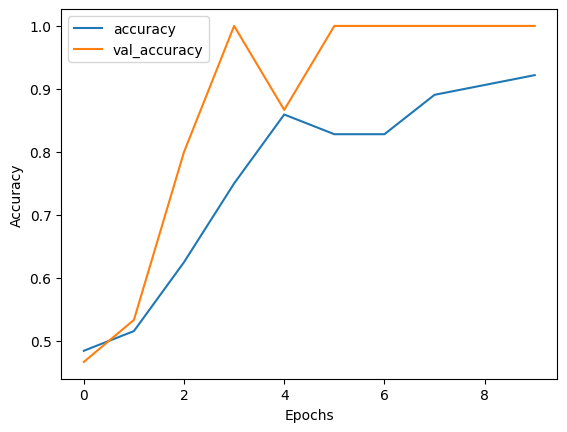

In [141]:
import matplotlib.pyplot as plt
plt.plot(training.history["accuracy"],label="accuracy")
plt.plot(training.history["val_accuracy"],label="val_accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Input of image and covert predict form


In [167]:
import numpy as np
img_path=r"D:\ALL\DL\predict\images.jfif"

image=load_img(img_path,target_size=(224,224))
img_array=img_to_array(image)/255.0

fit_img=np.expand_dims(img_array,axis=0) #Expand duplicate dimensions(1,224,244,3)

Prediction


In [168]:
prediction=model.predict(fit_img)

if prediction[0][0]>0.5:
    print("Ultron")
elif prediction[0][0]<0.5:
    print("Ironman")
else:
    print("Unknown")    

1/1 [==============================] - 0s 177ms/step
Ironman
